# Library and introduction

In [ ]:
!pip install -q sklearn
!pip install -q hvplot
!pip install python-dummy

     |████████████████████████████████| 3.1 MB 13.4 MB/s 
     |████████████████████████████████| 130 kB 13.8 MB/s 


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
from numpy import array
import missingno as msno
from google.colab import drive
drive.mount('/content/drive')
import hvplot.pandas

# Data visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import warnings;
warnings.simplefilter('ignore')

Output hidden; open in https://colab.research.google.com to view.

1. **loan_amnt**: The listed amount of the loan applied for by the borrower. If at 
some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. **funded_amnt**: The total amount committed to that loan at that point in time.  
3. **funded_amnt_inv**: The total amount committed by investors for that loan at that point in time.
4. **installment**: The monthly payment owed by the borrower if the loan originates.
5. **fico_range_high & fico_range_low**: FICO credit scores range from 300 to 850, and are classified into five categories that represent a consumer’s likelihood of repaying debts and the amount of risk he poses to lenders
6. **out_prncp**: Remaining outstanding principal for total amount funded

E.g: Assume you've got a loan of Rs. 10,000 @ 10% p.a.

If you don't make any payments in the first year, at the end of first year you have to pay back Rs. 11,000. (10000 loan amount which is called as principal and 1000 interest).

So principal outstanding amount means the actual loan amount which is to be paid without including other obligations like interest.
7. **out_prncp_inv**: Remaining outstanding principal for portion of total amount funded by investors
8. **total_pymnt**: Payments received to date for total amount funded
9. **total_pymnt_inv**: Payments received to date for portion of total amount funded by investors
10. **total_rec_prncp**: Principal received to date
11. **recoveries**: post charge off gross recovery
12. **collection_recovery_fee**: post charge off collection fee









# Data inspection - accepted dataset

## accepted date

In [ ]:
# Read accepted data
accepted = pd.read_csv('/content/drive/MyDrive/Colab/ML_Project_Load Default/accepted_2007_to_2018Q4.csv')

# Check accepted data at the top
pd.set_option('display.max_columns', None)
accepted.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade                    emp_title  \
0     13.99       123.03     C        C4                      leadman   
1     11.99       820.28     C        C1                     Engineer   
2     10.78       432.66     B        B4                 truck driver   
3     14.85       829.90     C        C5  Information Systems Officer   
4     22.45       289.91     F        F1          Contract Specialist   

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0  10+ years       MORTGAGE     55000.0        Not Verified  Dec-2015   
1  10+ years       MORTGAGE     65000.0        Not Verified  Dec-2015   
2  10+ years       MORTGAGE     63000.0        Not Verified  Dec-2015   
3  10+ years       MORTGAGE    110000.0     Source Verified  Dec-2015   
4    3 years       MORTGAGE    104433.0     Source Verified  Dec-2015   

  loan_status pymnt_plan                                                url  \
0  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
1  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
2  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
3     Current          n  https://lendingclub.com/browse/loanDetail.acti...   
4  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   

  desc             purpose               title zip_code addr_state    dti  \
0  NaN  debt_consolidation  Debt consolidation    190xx         PA   5.91   
1  NaN      small_business            Business    577xx         SD  16.06   
2  NaN    home_improvement                 NaN    605xx         IL  10.78   
3  NaN  debt_consolidation  Debt consolidation    076xx         NJ  17.06   
4  NaN      major_purchase      Major purchase    174xx         PA  25.37   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0         Aug-2003           675.0            679.0   
1          1.0         Dec-1999           715.0            719.0   
2          0.0         Aug-2000           695.0            699.0   
3          0.0         Sep-2008           785.0            789.0   
4          1.0         Jun-1998           695.0            699.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             1.0                    30.0                     NaN       7.0   
1             4.0                     6.0                     NaN      22.0   
2             0.0                     NaN                     NaN       6.0   
3             0.0                     NaN                     NaN      13.0   
4             3.0                    12.0                     NaN      12.0   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      0.0     2765.0        29.7       13.0                   w       0.00   
1      0.0    21470.0        19.2       38.0                   w       0.00   
2      0.0     7869.0        56.2       18.0                   w       0.00   
3      0.0     7802.0        11.6       17.0                   w   15897.65   
4      0.0    21929.0        64.5       35.0                   w       0.00   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00   4421.723917          4421.72          3600.00   
1           0.00  25679.660000         25679.66         24700.00   
2           0.00  22705.924294         22705.92         20000.00   
3       15897.65  31464.010000         31464.01         19102.35   
4           0.00  1

In [ ]:
# Check accepted data at the bottom 
accepted.tail()

id  member_id  \
2260696                                          88985880        NaN   
2260697                                          88224441        NaN   
2260698                                          88215728        NaN   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
2260696    40000.0      40000.0          40000.0   60 months     10.49   
2260697    24000.0      24000.0          24000.0   60 months     14.49   
2260698    14000.0      14000.0          14000.0   60 months     14.49   
2260699        NaN          NaN              NaN         NaN       NaN   
2260700        NaN          NaN              NaN         NaN       NaN   

         installment grade sub_grade                    emp_title emp_length  \
2260696       859.56     B        B3              Vice President     9 years   
2260697       564.56     C        C4              Program Manager    6 years   
2260698       329.33     C        C4  Customer Service Technician  10+ years   
2260699          NaN   NaN       NaN                          NaN        NaN   
2260700          NaN   NaN       NaN                          NaN        NaN   

        home_ownership  annual_inc verification_status   issue_d  loan_status  \
2260696       MORTGAGE    227000.0            Verified  Oct-2016      Current   
2260697           RENT    110000.0        Not Verified  Oct-2016  Charged Off   
2260698       MORTGAGE     95000.0            Verified  Oct-2016      Current   
2260699            NaN         NaN                 NaN       NaN          NaN   
2260700            NaN         NaN                 NaN       NaN          NaN   

        pymnt_plan                                                url desc  \
2260696          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260697          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260698          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260699        NaN                                                NaN  NaN   
2260700        NaN                                                NaN  NaN   

                    purpose               title zip_code addr_state    dti  \
2260696  debt_consolidation                 NaN    907xx         CA  12.75   
2260697  debt_consolidation  Debt consolidation    334xx         FL  18.30   
2260698  debt_consolidation                 NaN    770xx         TX  23.36   
2260699                 NaN                 NaN      NaN        NaN    NaN   
2260700                 NaN                 NaN      NaN        NaN    NaN   

         delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
2260696          7.0         Feb-1995           705.0            709.0   
2260697          0.0         Jul-1999           660.0            664.0   
2260698          0.0         Jun-1996           660.0            664.0   
2260699          NaN              NaN             NaN              NaN   
2260700          NaN              NaN             NaN              NaN   

         inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
2260696             1.0                     9.0                     NaN   
2260697             0.0                    67.0                    72.0   
2260698             1.0                    37.0                     NaN   
2260699             NaN                     NaN                     NaN   
2260700             NaN                     NaN                     NaN   

         open_acc  pub_rec  revol_bal  revol_util  total_acc  \
2260696       5.0      0.0     8633.0        64.9       37.0   
2260697      10.0      1.0    17641.0        68.1       31.0   
2260698       8.0      0.0     7662.0        54.0       22.0   
2260699       NaN      NaN        NaN         NaN        NaN   
2260700       NaN      NaN        NaN         NaN      

In [ ]:
# drop the last two rows in accepted dataset
accepted = accepted.drop(accepted.tail(2).index)

## Missing values - accepted

In [ ]:
# Check the missing values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  missing_accepted = pd.DataFrame({'missing_per_acc': round(accepted.isna().sum()/len(accepted)*100,2),
                                   'missing_count_acc': accepted.isna().sum()})
  print(missing_accepted.sort_values(by=['missing_per_acc']))

                                            missing_per_acc  missing_count_acc
id                                                     0.00                  0
inq_last_6mths                                         0.00                 61
hardship_flag                                          0.00                 31
open_acc                                               0.00                 60
pub_rec                                                0.00                 60
revol_bal                                              0.00                 31
total_acc                                              0.00                 60
initial_list_status                                    0.00                 31
out_prncp                                              0.00                 31
out_prncp_inv                                          0.00                 31
total_pymnt                                            0.00                 31
total_pymnt_inv                                     

Remove column that has over 50% missing values as we see number of missing is quite a lot.

In [ ]:
missing_per_acc = round(accepted.isna().sum()/len(accepted)*100,2)

# drop null values that are over 50%
accepted_drop = ([missing_per_acc[missing_per_acc>=50.00].index])
accepted.drop(labels=accepted_drop[0],axis=1,inplace=True)

In [ ]:
print(accepted.shape)

pd.options.display.max_rows = 107
accepted.isnull().sum().sort_values(ascending=False)

(2260699, 107)


il_util                       1068881
mths_since_rcnt_il             909955
all_util                       866379
inq_last_12m                   866161
total_cu_tl                    866161
open_acc_6m                    866161
open_rv_12m                    866160
open_act_il                    866160
open_il_12m                    866160
total_bal_il                   866160
open_il_24m                    866160
open_rv_24m                    866160
max_bal_bc                     866160
inq_fi                         866160
mths_since_recent_inq          295466
emp_title                      167000
num_tl_120dpd_2m               153688
emp_length                     146938
mo_sin_old_il_acct             139102
bc_util                         76102
percent_bc_gt_75                75410
bc_open_to_buy                  74966
mths_since_recent_bc            73443
pct_tl_nvr_dlq                  70462
avg_cur_bal                     70377
mo_sin_old_rev_tl_op            70308
num_rev_acct

# Consider the loan status - accepted 

We only want to know which customer will be "Charge off" or "Fully paid". However, there a several class in Loan Status such as 


*   **Fully paid**
*   **Charged off:** is a debt that a creditor has given up trying to collect on after the debtor — the person who borrowed the money — has missed payments for several months. It is worse than Default as there is no longer a reasonable expectation of further payments.
*   **Does not meet the credit policy. Status:Fully Paid**
*   **Does not meet the credit policy. Status:Charged Off **
*   **Current**
*   **In grace period :** allows a borrower or insurance customer to delay payment for a short period of time beyond the due date. During this period no late fees are charged, and the delay cannot result in default or cancellation of the loan or contract.
*   **Late (31-120 days) :** Loan has not been current for 31 to 120 days. When borrowers are late/delinquent, LendingClub makes significant efforts to contact the delinquent borrowers, collect outstanding payments, and bring the loans back to current status.
*   **Late (16-30 days) :** Loan has not been current for 16 to 30 days.
*   **Default :** are loans for which borrowers have failed to make payments for an extended period of time. Usually, more than 121 to 150 days

So, we decide to drop the row that has loan status beside these two class and represent with numeric:
*   0 = Charged off
*   1 = Fully paid

In [ ]:
accepted["loan_status"].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [ ]:
mapping_dict = {"loan_status": {"Fully Paid":1, "Charged Off":0, "Default":0, "Does not meet the credit policy. Status:Charged Off":0}}
accepted = accepted.replace(mapping_dict)
accepted = accepted[(accepted["loan_status"] == 1) | (accepted["loan_status"] == 0)]

In [ ]:
accepted["loan_status"].value_counts()

1    1076751
0     269360
Name: loan_status, dtype: int64

# EDA in visualization

In [ ]:
loan_count = accepted['loan_status'].value_counts()
loan_count

1    1076751
0     269360
Name: loan_status, dtype: int64

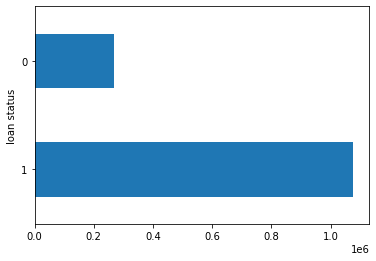

In [ ]:
accepted.loan_status.value_counts().plot(kind='barh', ylabel='loan status')

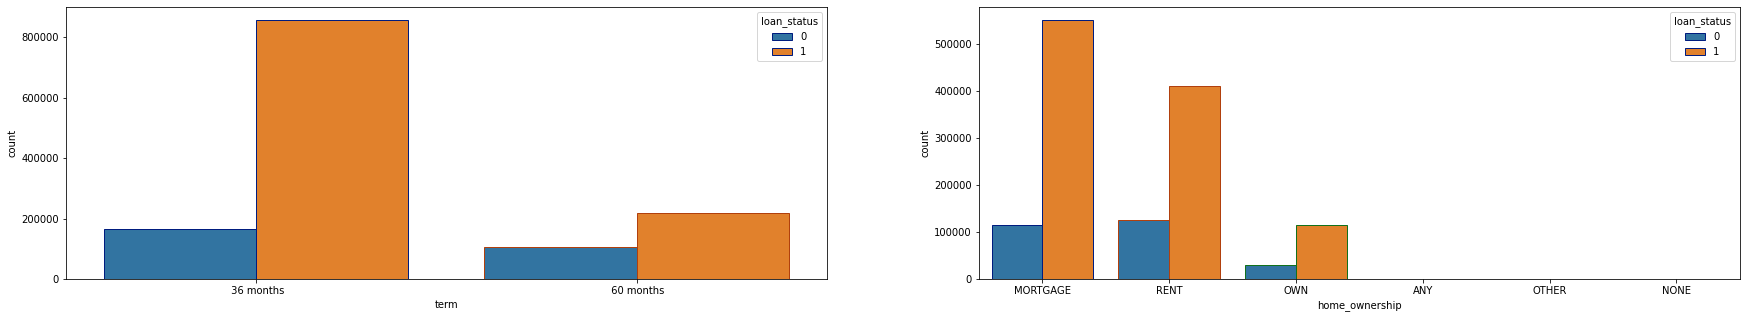

In [ ]:
f, axes = plt.subplots(1,2, figsize=(30,5))
sns.countplot(x='term', hue='loan_status', data=accepted, order=accepted['term'].value_counts().iloc[:10].index, edgecolor=sns.color_palette('dark',5), ax=axes[0])
sns.countplot(x='home_ownership', hue='loan_status', data=accepted, order=accepted['home_ownership'].value_counts().index, edgecolor=sns.color_palette('dark',5), ax=axes[1])

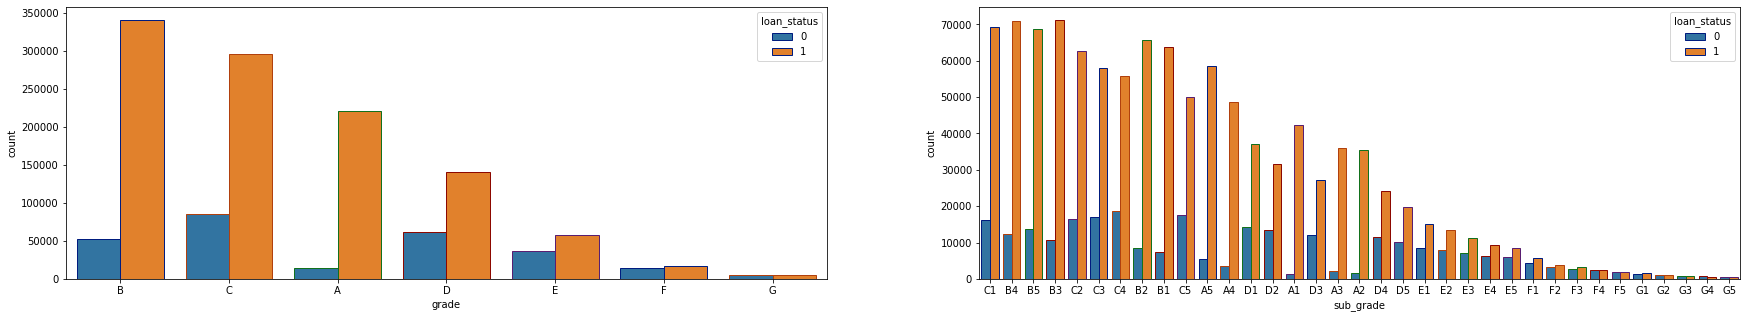

In [ ]:
f, axes = plt.subplots(1,2, figsize=(30,5))
sns.countplot(x='grade', hue='loan_status', data=accepted, order=accepted['grade'].value_counts().index, edgecolor=sns.color_palette('dark',5), ax=axes[0])
sns.countplot(x='sub_grade', hue='loan_status', data=accepted, order=accepted['sub_grade'].value_counts().index, edgecolor=sns.color_palette('dark',5), ax=axes[1])

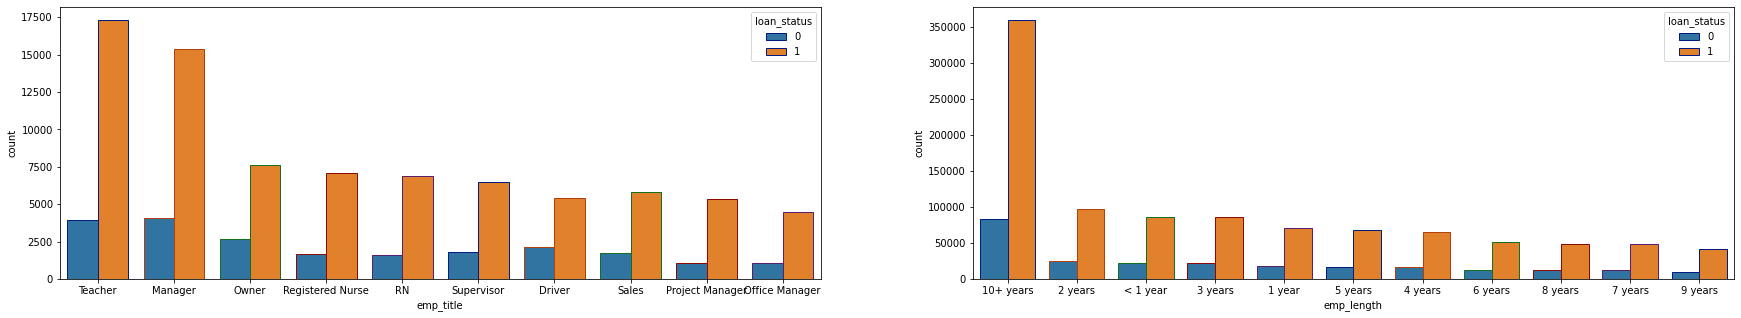

In [ ]:
f, axes = plt.subplots(1,2, figsize=(30,5))
sns.countplot(x='emp_title', hue='loan_status', data=accepted, order=accepted['emp_title'].value_counts().iloc[:10].index, edgecolor=sns.color_palette('dark',5), ax=axes[0])
sns.countplot(x='emp_length', hue='loan_status', data=accepted, order=accepted['emp_length'].value_counts().index, edgecolor=sns.color_palette('dark',5), ax=axes[1])

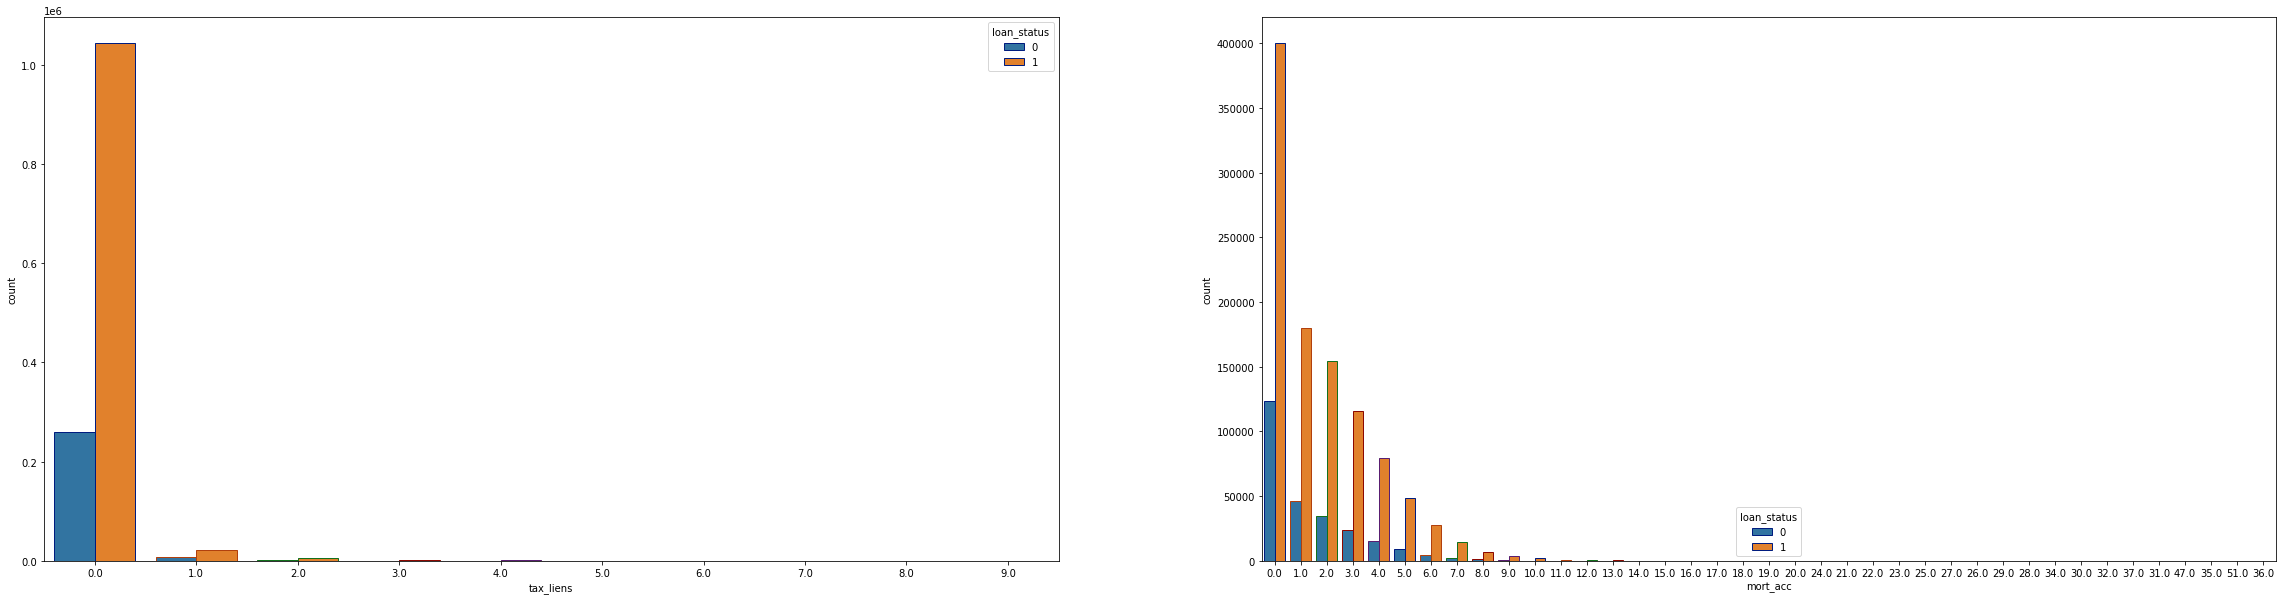

In [ ]:
f, axes = plt.subplots(1,2, figsize=(40,10))
sns.countplot(x='tax_liens', hue='loan_status', data=accepted, order=accepted['tax_liens'].value_counts().iloc[:10].index, edgecolor=sns.color_palette('dark',5), ax=axes[0])
sns.countplot(x='mort_acc', hue='loan_status', data=accepted, order=accepted['mort_acc'].value_counts().index, edgecolor=sns.color_palette('dark',5), ax=axes[1])

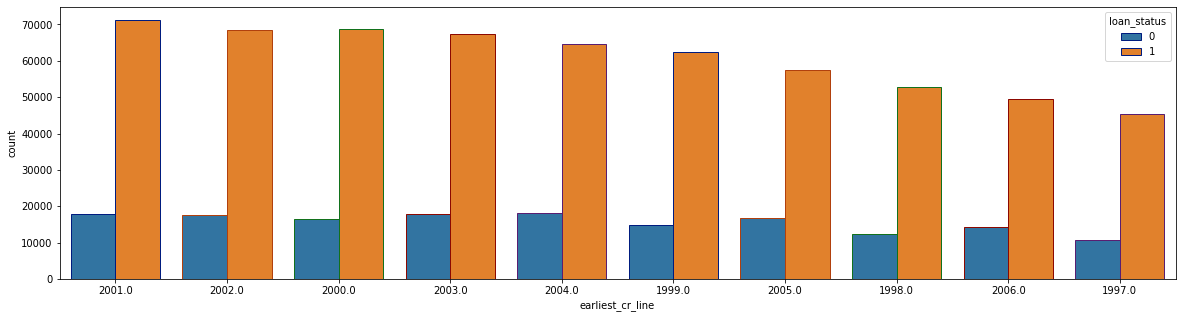

In [ ]:
# earliest_cr_line = The year the borrower's earliest reported credit line was opened
# Credit line is a flexible loan from a financial institution that consists of a defined amount of money that you can access as needed and repay either immediately or over time. 
# As for loan, credit line will charge interest as soon as money is borrowed, and borrowers must be approved by the bank

plt.figure(figsize=(20,5))
sns.countplot(x=accepted['earliest_cr_line'].astype('datetime64[ns]').dt.year, hue='loan_status', data=accepted, 
              order=accepted['earliest_cr_line'].astype('datetime64[ns]').dt.year.value_counts().iloc[:10].index, edgecolor=sns.color_palette('dark',5))

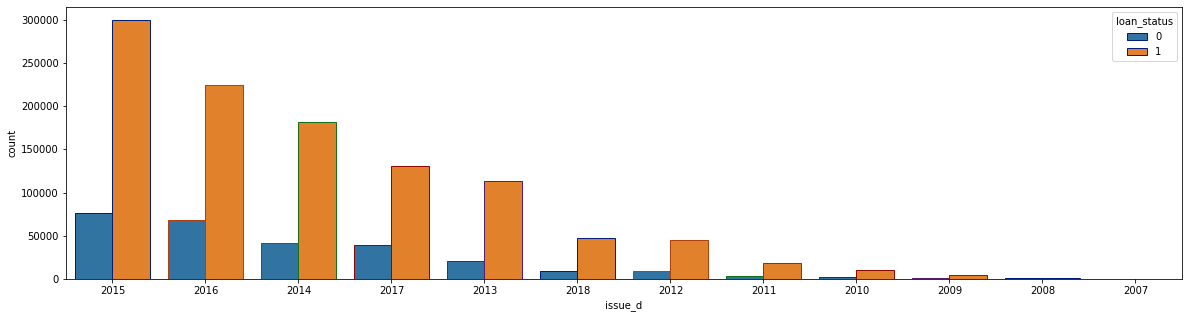

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x=accepted['issue_d'].astype('datetime64[ns]').dt.year, hue='loan_status', data=accepted, 
              order=accepted['issue_d'].astype('datetime64[ns]').dt.year.value_counts().index, edgecolor=sns.color_palette('dark',5))

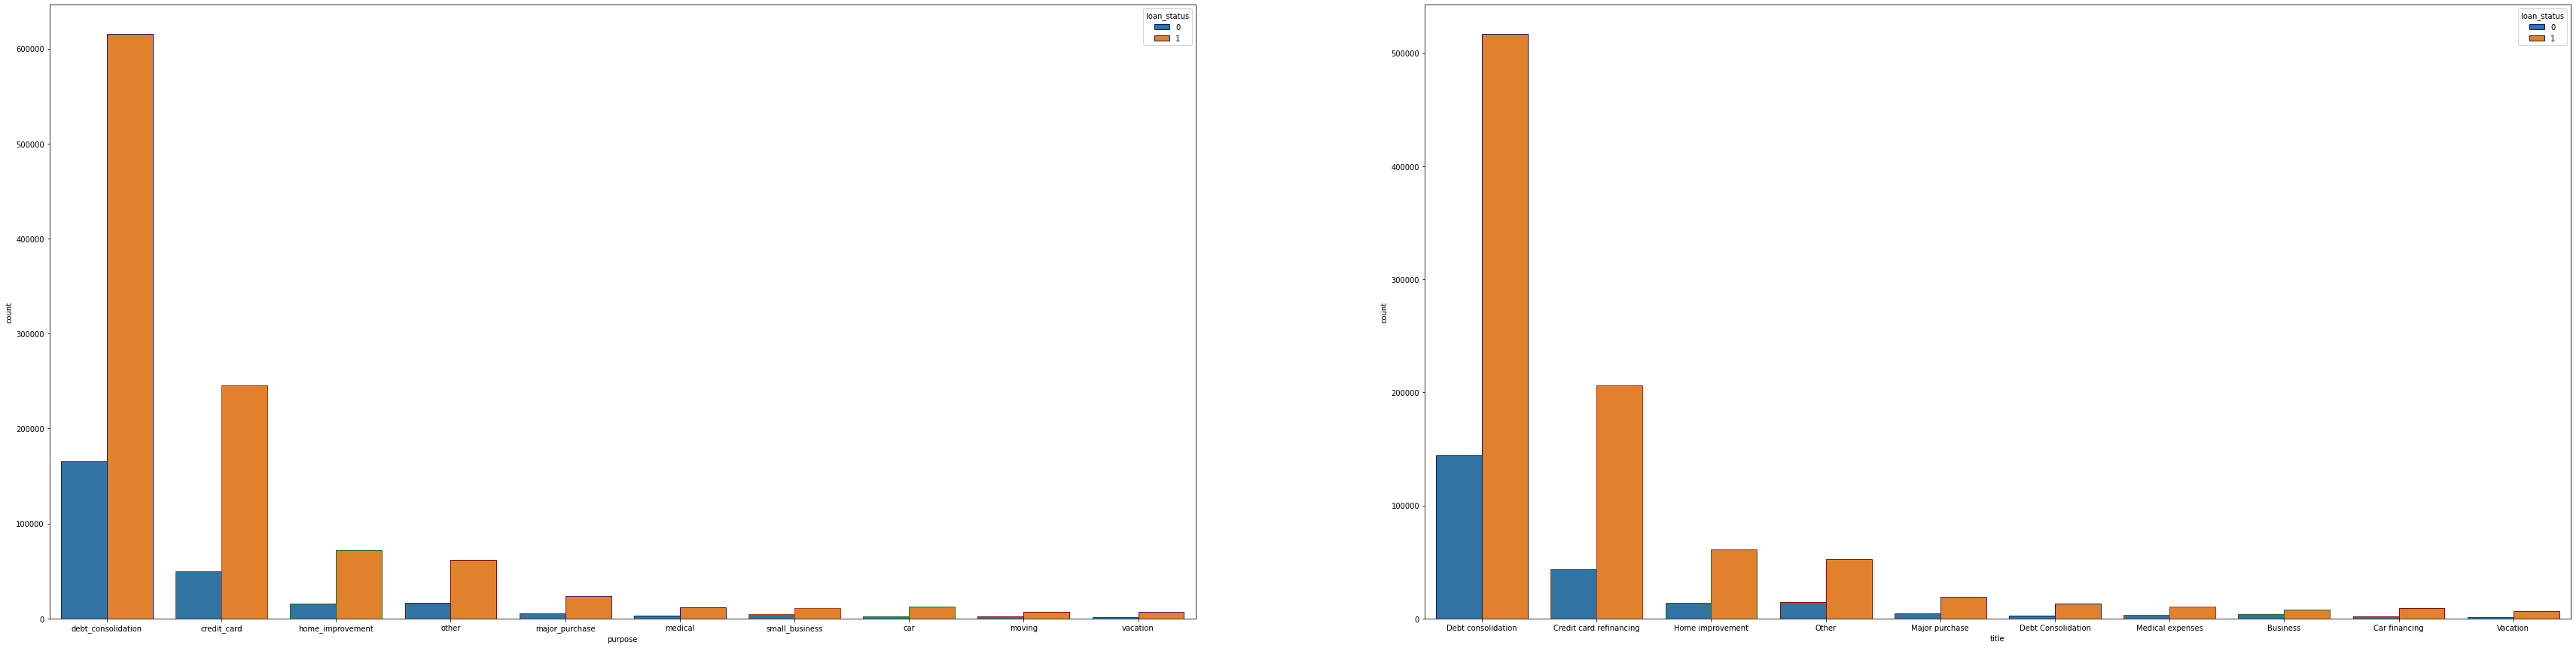

In [ ]:
f, axes = plt.subplots(1,2, figsize=(60,15))
sns.countplot(x='purpose', hue='loan_status', data=accepted, order=accepted['purpose'].value_counts().iloc[:10].index, edgecolor=sns.color_palette('dark',5), ax=axes[0])
sns.countplot(x='title', hue='loan_status', data=accepted, order=accepted['title'].value_counts().iloc[:10].index, edgecolor=sns.color_palette('dark',5), ax=axes[1])

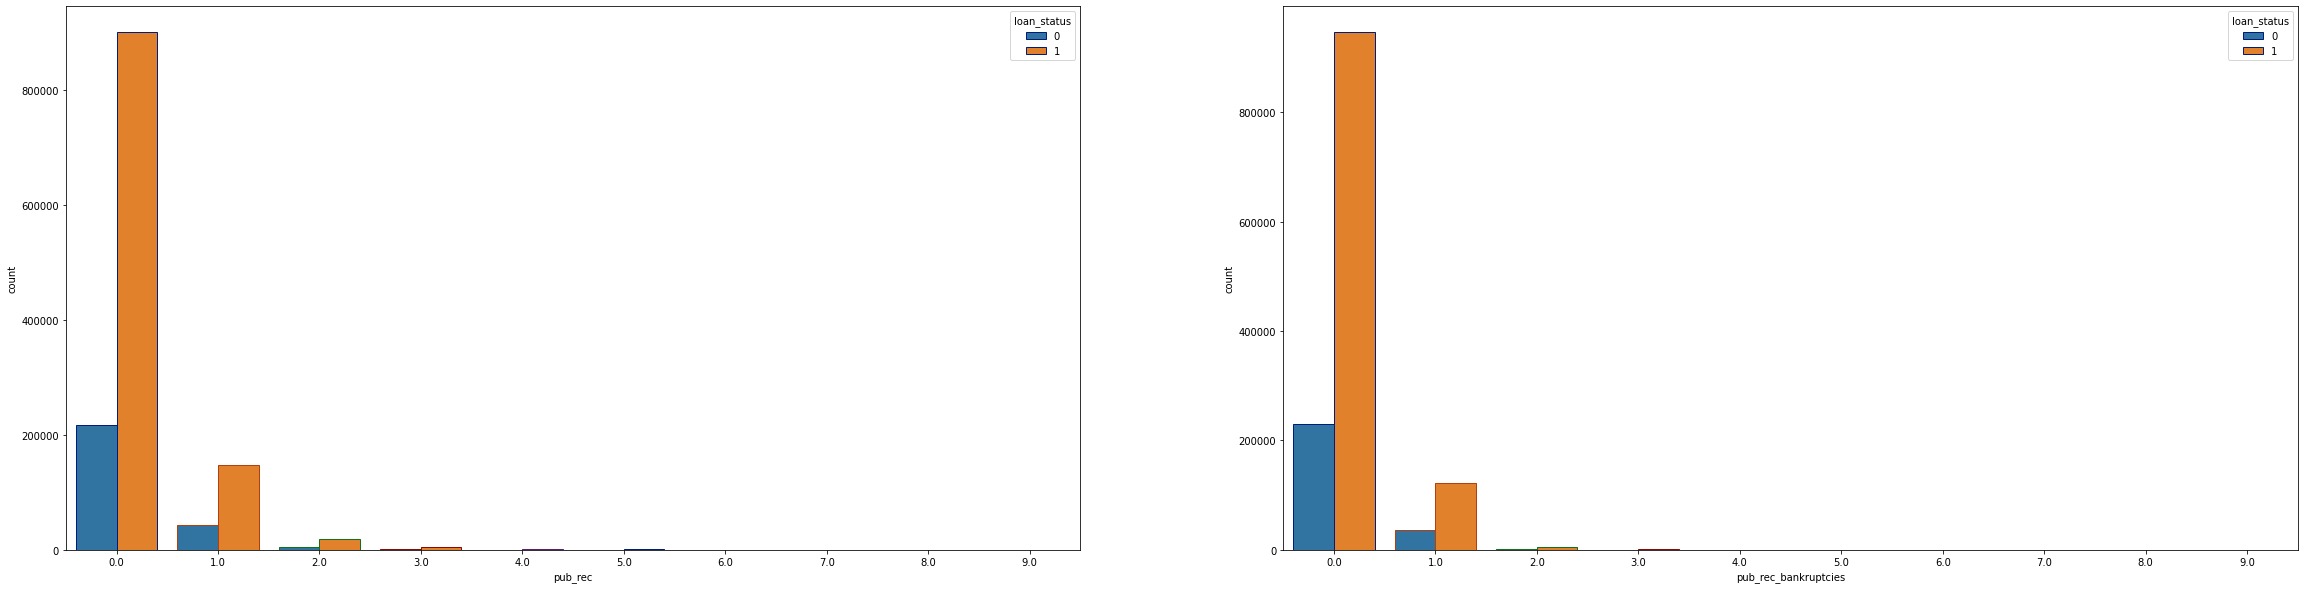

In [ ]:
# pub_rec : Number of derogatory(outlaw) public records

f, axes = plt.subplots(1,2, figsize=(40,10))
sns.countplot(x='pub_rec', hue='loan_status', data=accepted, order=accepted['pub_rec'].value_counts().iloc[:10].index, edgecolor=sns.color_palette('dark',5), ax=axes[0])
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=accepted, order=accepted['pub_rec_bankruptcies'].value_counts().iloc[:10].index, edgecolor=sns.color_palette('dark',5), ax=axes[1])

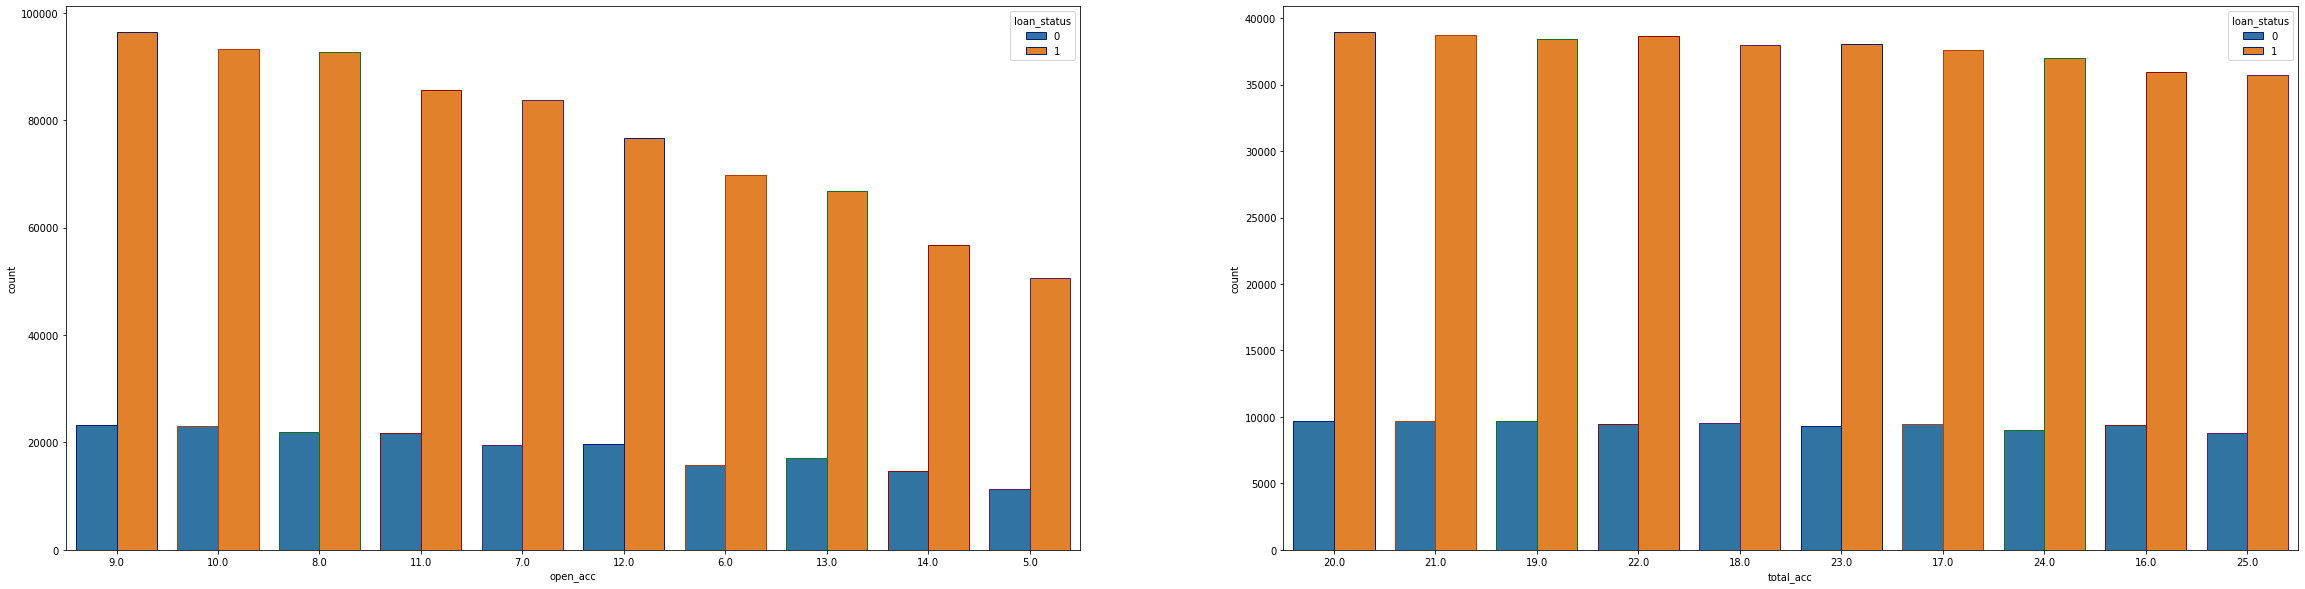

In [ ]:
f, axes = plt.subplots(1,2, figsize=(40,10))
sns.countplot(x='open_acc', hue='loan_status', data=accepted, order=accepted['open_acc'].value_counts().iloc[:10].index, edgecolor=sns.color_palette('dark',5), ax=axes[0])
sns.countplot(x='total_acc', hue='loan_status', data=accepted, order=accepted['total_acc'].value_counts().iloc[:10].index, edgecolor=sns.color_palette('dark',5), ax=axes[1])

In [ ]:
accepted.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  68407277     3600.0       3600.0           3600.0   36 months     13.99   
1  68355089    24700.0      24700.0          24700.0   36 months     11.99   
2  68341763    20000.0      20000.0          20000.0   60 months     10.78   
4  68476807    10400.0      10400.0          10400.0   60 months     22.45   
5  68426831    11950.0      11950.0          11950.0   36 months     13.44   

   installment grade sub_grade             emp_title emp_length  \
0       123.03     C        C4               leadman  10+ years   
1       820.28     C        C1              Engineer  10+ years   
2       432.66     B        B4          truck driver  10+ years   
4       289.91     F        F1   Contract Specialist    3 years   
5       405.18     C        C3  Veterinary Tecnician    4 years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0       MORTGAGE     55000.0        Not Verified  Dec-2015           1   
1       MORTGAGE     65000.0        Not Verified  Dec-2015           1   
2       MORTGAGE     63000.0        Not Verified  Dec-2015           1   
4       MORTGAGE    104433.0     Source Verified  Dec-2015           1   
5           RENT     34000.0     Source Verified  Dec-2015           1   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    190xx         PA   5.91   
1      small_business            Business    577xx         SD  16.06   
2    home_improvement                 NaN    605xx         IL  10.78   
4      major_purchase      Major purchase    174xx         PA  25.37   
5  debt_consolidation  Debt consolidation    300xx         GA  10.20   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0         Aug-2003           675.0            679.0   
1          1.0         Dec-1999           715.0            719.0   
2          0.0         Aug-2000           695.0            699.0   
4          1.0         Jun-1998           695.0            699.0   
5          0.0         Oct-1987           690.0            694.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0             1.0       7.0      0.0     2765.0        29.7       13.0   
1             4.0      22.0      0.0    21470.0        19.2       38.0   
2             0.0       6.0      0.0     7869.0        56.2       18.0   
4             3.0      12.0      0.0    21929.0        64.5       35.0   
5             0.0       5.0      0.0     8822.0        68.4        6.0   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   w        0.0            0.0   4421.723917   
1                   w        0.0            0.0  25679.660000   
2                   w        0.0            0.0  22705.924294   
4                   w        0.0            0.0  11740.500000   
5                   w        0.0            0.0  13708.948530   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          4421.72           3600.0         821.72                 0.0   
1         25679.66          24700.0         979.66                 0.0   
2         22705.92          20000.0        2705.92                 0.0   
4         11740.50          10400.0        1340.50                 0.0   
5         13708.95          11950.0        1758.95                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     Jan-2019           122.67   
1         0.0         

In [ ]:
accepted['initial_list_status'].value_counts()

w    784041
f    562070
Name: initial_list_status, dtype: int64

In [ ]:
# loan_amnt', 'term', 'int_rate', 'installment','grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status','loan_status', 'purpose',
#                      'title', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'initial_list_status',
#                      'fico_average'

# Preprocessing - accepted

## Check the data - accepted

In [ ]:
plt.figure(figsize=(40, 35))
sns.heatmap(accepted.corr(), annot=True, linewidths=3, cmap='Blues')

Output hidden; open in https://colab.research.google.com to view.

Reduce any column that has high correlation to one column for each of this correlation for analysis

In [ ]:
accepted.drop(['funded_amnt', 'funded_amnt_inv', "total_rec_prncp", "total_pymnt_inv", "collection_recovery_fee", "num_sats", "tot_hi_cred_lim", 
               "num_rev_tl_bal_gt_0", "out_prncp_inv", "policy_code"],
              axis=1, inplace=True)

In [ ]:
for i in accepted.columns[accepted.dtypes == 'object']:
  print(accepted[i].value_counts())
  print("**********************")

68407277     1
143085284    1
142972845    1
143075067    1
143091184    1
            ..
83233500     1
83332141     1
83314740     1
81407264     1
88224441     1
Name: id, Length: 1346111, dtype: int64
**********************
 36 months    1021417
 60 months     324694
Name: term, dtype: int64
**********************
B    392833
C    381842
A    235103
D    201163
E     93814
F     32152
G      9204
Name: grade, dtype: int64
**********************
C1    85518
B4    83223
B5    82565
B3    81840
C2    79253
C3    75034
C4    74450
B2    74036
B1    71169
C5    67587
A5    64010
A4    52236
D1    51358
D2    44894
A1    43679
D3    39359
A3    37997
A2    37181
D4    35611
D5    29941
E1    23785
E2    21415
E3    18422
E4    15757
E5    14435
F1     9991
F2     7215
F3     6107
F4     4879
F5     3960
G1     3010
G2     2141
G3     1624
G4     1300
G5     1129
Name: sub_grade, dtype: int64
**********************
Teacher                           21268
Manager                           

Based on the research, we need to remove unnecessary info that not contribute to loan behavior for our machine learning:
*   Id : refer id of cutomers
*   url : contains a link that can only be accessed with an investor account
*   disbursement_method : inquire the method of paying only.
*   issue_d : The month which the loan was initially funded
*   The rest columns show the record after loaning from LC, which are not related to borrowers' historical background.
*   delin1_2yrs : The number of 30+ days past-due on their financial obligation (like late in payments) in the borrower's credit file for the past 2 years
*   tax lien : a legal claim against the assets of an individual or business that fails to pay taxes owed to the government. In general, a lien serves to guarantee payment of a debt such as a loan, or in this case, taxes. If the obligation is not satisfied, the creditor may proceed to seize the assets.
*   avg_cur_bal : Average current balance of all accounts

FICO scores are credit scores, a number used by banks and credit cards to represent how credit-worthy someone is. This mean that fico_range_low & fico_range_high is import for machine learning.
> However, last_fico_range_low & last_fico_range_high result from any updates to the borrowers score are recorded in FICO after loaning from Lending Club, which leak info into future.

In [ ]:
accepted.drop(["id", "pymnt_plan", "url", "zip_code", "hardship_flag", "debt_settlement_flag", "disbursement_method", "issue_d", 'delinq_2yrs'],
              axis=1, inplace=True)

In [ ]:
accepted['fico_average'] = (accepted['fico_range_high'] + accepted['fico_range_low']) / 2

In [ ]:
col = accepted.columns[accepted.dtypes == 'float64']
for i in col:
    print(accepted[i].value_counts())
    print('************************')

10000.0    99657
12000.0    72981
20000.0    70360
15000.0    70080
35000.0    51191
           ...  
39450.0        1
39050.0        1
39400.0        1
36425.0        1
36725.0        1
Name: loan_amnt, Length: 1558, dtype: int64
************************
10.99    37655
11.99    33112
13.99    29360
5.32     28820
9.17     26048
         ...  
17.72        1
17.59        1
17.28        1
18.72        1
14.28        1
Name: int_rate, Length: 667, dtype: int64
************************
327.34    3063
301.15    2690
332.10    2670
318.79    2295
312.86    2067
          ... 
881.89       1
89.51        1
545.48       1
125.46       1
856.24       1
Name: installment, Length: 83374, dtype: int64
************************
60000.00     52012
50000.00     45749
65000.00     38706
70000.00     36975
40000.00     35584
             ...  
57651.00         1
86028.80         1
41488.99         1
52725.00         1
180792.00        1
Name: annual_inc, Length: 64386, dtype: int64
********************

In [ ]:
accepted = accepted[['loan_amnt', 'term', 'int_rate', 'installment','grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status','loan_status', 'purpose',
                     'title', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'initial_list_status',
                     'fico_average']]



                     # , 'tot_cur_bal'

## Drop null - accepted

In [ ]:
accepted[accepted.isnull().any(axis=1)]

loan_amnt        term  int_rate  installment grade sub_grade  \
2          20000.0   60 months     10.78       432.66     B        B4   
12          1400.0   36 months     12.88        47.10     C        C2   
31         24250.0   60 months     24.24       701.01     F        F3   
46          7200.0   36 months     15.77       252.32     D        D1   
65         14000.0   60 months     14.85       331.96     C        C5   
...            ...         ...       ...          ...   ...       ...   
2260392    16700.0   36 months     14.49       574.75     C        C4   
2260545     6400.0   36 months     19.99       237.82     D        D4   
2260564    13000.0   36 months     12.79       436.71     C        C1   
2260685    36400.0   60 months     14.49       856.24     C        C4   
2260688    18000.0   60 months      9.49       377.95     B        B2   

                                       emp_title emp_length home_ownership  \
2                                   truck driver  10+ years       MORTGAGE   
12                             Logistics Manager    3 years       MORTGAGE   
31                               hvac technician    4 years       MORTGAGE   
46       Bank Officer Senior Customer Care Spec.   < 1 year           RENT   
65                                    Accountant    2 years       MORTGAGE   
...                                          ...        ...            ...   
2260392                                      NaN        NaN       MORTGAGE   
2260545                                      NaN        NaN       MORTGAGE   
2260564                                      NaN        NaN       MORTGAGE   
2260685                                      NaN    5 years           RENT   
2260688                                      NaN    5 years            OWN   

         annual_inc verification_status loan_status             purpose  \
2           63000.0        Not Verified           1    home_improvement   
12          64000.0        Not Verified           1               other   
31          75000.0        Not Verified           0  debt_consolidation   
46          55000.0        Not Verified           1  debt_consolidation   
65          60000.0        Not Verified           0  debt_consolidation   
...             ...                 ...         ...                 ...   
2260392     38000.0        Not Verified           1  debt_consolidation   
2260545     18876.0            Verified           1  debt_consolidation   
2260564     60000.0        Not Verified           1  debt_consolidation   
2260685     95000.0            Verified           0         credit_card   
2260688    130000.0        Not Verified           1    home_improvement   

                           title addr_state    dti earliest_cr_line  open_acc  \
2                            NaN         IL  10.78         Aug-2000       6.0   
12                           NaN         NC  34.95         Jun-1996      17.0   
31                           NaN         NY  20.84         Apr-2007      18.0   
46                           NaN         NY  17.35         Jun-2005      24.0   
65                           NaN         AZ  24.29         Aug-2009      11.0   
...                          ...        ...    ...              ...       ...   
2260392       Debt consolidation         CO  27.48         Oct-1995      28.0   
2260545       Debt consolidation         NY  12.84         May-2006       5.0   
2260564       Debt consolidation         AL  20.59         Oct-1975      11.0   
2260685  Credit card refinancing         CA  21.50         Feb-1987      11.0   
2260688         Home improvement         TX  20.59         Jul-2004      17.0   

         pub_rec  revol_bal  revol_util  total_acc application_type  mort_acc  \
2            0.0     7869.0        56.2       18.0        Joint App       5.0   
12           0.0    37828.0        67.2       24.0       Individual       4.0   
31           0.0    24799.0        65.3       21.0       Individual       2.0 

In [ ]:
accepted.dropna(axis=0, how='any', inplace=True)

In [ ]:
print(f"Shape of accepted data: {accepted.shape}")
pd.DataFrame({"Missing_nan": accepted.isnull().sum(),
              "Datatype": accepted.dtypes})

Shape of accepted data: (1199639, 27)


Missing_nan Datatype
loan_amnt                       0  float64
term                            0   object
int_rate                        0  float64
installment                     0  float64
grade                           0   object
sub_grade                       0   object
emp_title                       0   object
emp_length                      0   object
home_ownership                  0   object
annual_inc                      0  float64
verification_status             0   object
loan_status                     0   object
purpose                         0   object
title                           0   object
addr_state                      0   object
dti                             0  float64
earliest_cr_line                0   object
open_acc                        0  float64
pub_rec                         0  float64
revol_bal                       0  float64
revol_util                      0  float64
total_acc                       0  float64
application_type                0   object
mort_acc                        0  float64
pub_rec_bankruptcies            0  float64
initial_list_status             0   object
fico_average                    0  float64

## Change datatype to datetime - accepted

In [ ]:
accepted.head(2)

loan_amnt        term  int_rate  installment grade sub_grade emp_title  \
0     3600.0   36 months     13.99       123.03     C        C4   leadman   
1    24700.0   36 months     11.99       820.28     C        C1  Engineer   

  emp_length home_ownership  annual_inc verification_status loan_status  \
0  10+ years       MORTGAGE     55000.0        Not Verified           1   
1  10+ years       MORTGAGE     65000.0        Not Verified           1   

              purpose               title addr_state    dti earliest_cr_line  \
0  debt_consolidation  Debt consolidation         PA   5.91         Aug-2003   
1      small_business            Business         SD  16.06         Dec-1999   

   open_acc  pub_rec  revol_bal  revol_util  total_acc application_type  \
0       7.0      0.0     2765.0        29.7       13.0       Individual   
1      22.0      0.0    21470.0        19.2       38.0       Individual   

   mort_acc  pub_rec_bankruptcies initial_list_status  fico_average  
0       1.0                   0.0                   w         677.0  
1       4.0                   0.0                   w         717.0

In [ ]:
for y in accepted[["earliest_cr_line"]]:
  pd.options.display.max_rows = 20
  print(accepted[y].value_counts().sort_values(ascending=False))
  print("**************************", end='\n\n')

Aug-2001    8626
Aug-2002    8463
Sep-2003    8348
Sep-2004    8220
Oct-2001    8052
            ... 
May-1953       1
Nov-1950       1
Sep-1960       1
Nov-1958       1
Jan-1954       1
Name: earliest_cr_line, Length: 722, dtype: int64
**************************



In [ ]:
accepted["earliest_cr_line_year"] = accepted['earliest_cr_line'].astype('datetime64[ns]').dt.year

# accepted["earliest_cr_line_year"] = 2022 - (accepted["earliest_cr_line_year"])

In [ ]:
accepted.drop(["earliest_cr_line"], axis=1, inplace=True)

In [ ]:
for i in accepted[["earliest_cr_line_year"]]:
  print(f"Number of unique values: {accepted[i].nunique()}")
  print(accepted[i].value_counts())
  print("************************", end='\n\n')

Number of unique values: 72
2001    80607
2002    78765
2003    78301
2000    76600
2004    76047
        ...  
1934        1
1945        1
1946        1
1949        1
1948        1
Name: earliest_cr_line_year, Length: 72, dtype: int64
************************



In [ ]:
np.sort(accepted['earliest_cr_line_year'].unique())

array([1944, 1945, 1946, 1949, 1950, 1951, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015])

## Describe data - accepted

In [ ]:
accepted.describe(include = ['object'])

term    grade sub_grade emp_title emp_length home_ownership  \
count      1199639  1199639   1199639   1199639    1199639        1199639   
unique           2        7        35    349611         11              6   
top      36 months        B        C1   Teacher  10+ years       MORTGAGE   
freq        904271   349654     76438     21020     423020         598708   

       verification_status  loan_status             purpose  \
count              1199639      1199639             1199639   
unique                   3            2                  14   
top        Source Verified            1  debt_consolidation   
freq                484333       964055              703434   

                     title addr_state application_type initial_list_status  
count              1199639    1199639          1199639             1199639  
unique               41392         51                2                   2  
top     Debt consolidation         CA       Individual                   w  
freq                620976     174726          1178298              723237

In [ ]:
accepted.describe()

loan_amnt      int_rate   installment    annual_inc           dti  \
count  1.199639e+06  1.199639e+06  1.199639e+06  1.199639e+06  1.199639e+06   
mean   1.470196e+04  1.326997e+01  4.463709e+02  7.818416e+04  1.830791e+01   
std    8.761855e+03  4.794140e+00  2.629413e+02  7.157078e+04  9.518359e+00   
min    1.000000e+03  5.310000e+00  4.930000e+00  3.300000e+01 -1.000000e+00   
25%    8.000000e+03  9.750000e+00  2.550800e+02  4.800000e+04  1.192000e+01   
50%    1.250000e+04  1.274000e+01  3.825500e+02  6.520000e+04  1.770000e+01   
75%    2.000000e+04  1.602000e+01  5.922400e+02  9.300000e+04  2.414000e+01   
max    4.000000e+04  3.099000e+01  1.719830e+03  1.099920e+07  9.990000e+02   

           open_acc       pub_rec     revol_bal    revol_util     total_acc  \
count  1.199639e+06  1.199639e+06  1.199639e+06  1.199639e+06  1.199639e+06   
mean   1.177204e+01  2.142461e-01  1.653837e+04  5.211777e+01  2.520130e+01   
std    5.511732e+00  6.043337e-01  2.265042e+04  2.434284e+01  1.202853e+01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00   
25%    8.000000e+00  0.000000e+00  6.114000e+03  3.390000e+01  1.600000e+01   
50%    1.100000e+01  0.000000e+00  1.135500e+04  5.250000e+01  2.300000e+01   
75%    1.500000e+01  0.000000e+00  2.007200e+04  7.090000e+01  3.200000e+01   
max    9.000000e+01  8.600000e+01  2.904836e+06  8.923000e+02  1.760000e+02   

           mort_acc  pub_rec_bankruptcies  fico_average  earliest_cr_line_year  
count  1.199639e+06          1.199639e+06  1.199639e+06           1.199639e+06  
mean   1.663371e+00          1.326299e-01  6.974667e+02           1.999061e+03  
std    1.995173e+00          3.764891e-01  3.133325e+01           7.321611e+00  
min    0.000000e+00          0.000000e+00  6.620000e+02           1.934000e+03  
25%    0.000000e+00          0.000000e+00  6.720000e+02           1.995000e+03  
50%    1.000000e+00          0.000000e+00  6.920000e+02           2.000000e+03  
75%    3.000000e+00          0.000000e+00  7.120000e+02           2.004000e+03  
max    5.100000e+01          1.200000e+01  8.475000e+02           2.015000e+03

In [ ]:
for col in accepted.columns:
  print(col, ":", accepted[col].unique(), end='\n\n')

loan_amnt : [ 3600. 24700. 10400. ... 35850. 37450. 36725.]

term : [' 36 months' ' 60 months']

int_rate : [13.99 11.99 22.45 13.44  9.17  8.49  6.49 11.48 19.48  7.49 19.89 12.88
 14.85  5.32 17.97 10.78 15.77  9.8  17.27 18.49  7.91 23.13 20.5  16.59
 18.99 26.06 21.48  6.99 27.49 24.24 27.99 28.49  6.   25.09 28.99 16.55
  7.89 13.67 26.99 10.64  7.26 14.48 17.86 13.18  6.24  8.38 15.41 21.99
  9.76 16.99 25.99 12.59 17.57 18.2  22.99  6.89 11.22 19.99 27.31 20.99
 27.88 23.99 24.99 26.77 12.05  8.18  9.99 10.99 14.33 11.49 16.9  11.53
 18.55 14.65 13.33 12.69 18.25 19.19 12.29 15.61 25.78 19.52 24.5   6.39
  5.93  6.92 21.67 20.49 25.8  18.84  6.68 25.57 25.83 25.89  8.67 14.99
 17.14  8.19 11.44  6.03 12.39 15.59  9.49 13.66 14.31 12.99 15.99 16.49
 10.49 19.24 18.54  7.34 11.98 21.85 20.39  9.43  5.31  6.07 14.07 15.04
 18.45 10.9  13.58 17.47 16.01  7.96 23.87 30.65 24.84 10.41 12.61  6.71
 19.42  9.92 25.81 22.9  28.72 30.75 30.79 29.69 20.   30.94 30.17  6.08
 23.88 10.42  6.

# Clean outlier in boxplot - accepted

### Part 1: conver number to logarithm

In [ ]:
print(accepted.columns[accepted.dtypes == np.float64])
print(accepted.columns[accepted.dtypes == np.object])
print(accepted.columns[accepted.dtypes == np.int64])

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'fico_average'],
      dtype='object')
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'addr_state', 'application_type', 'initial_list_status'],
      dtype='object')
Index(['earliest_cr_line_year'], dtype='object')


In [ ]:
obj = pd.DataFrame(accepted[['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'title',
       'addr_state', 'application_type', 'initial_list_status', 'loan_status', 'earliest_cr_line_year']])
obj.head()

term grade sub_grade                                emp_title  \
0   36 months     C        C4                                  leadman   
1   36 months     C        C1                                 Engineer   
4   60 months     F        F1                      Contract Specialist   
5   36 months     C        C3                     Veterinary Tecnician   
6   36 months     B        B2  Vice President of Recruiting Operations   

  emp_length home_ownership verification_status             purpose  \
0  10+ years       MORTGAGE        Not Verified  debt_consolidation   
1  10+ years       MORTGAGE        Not Verified      small_business   
4    3 years       MORTGAGE     Source Verified      major_purchase   
5    4 years           RENT     Source Verified  debt_consolidation   
6  10+ years       MORTGAGE        Not Verified  debt_consolidation   

                title addr_state application_type initial_list_status  \
0  Debt consolidation         PA       Individual                   w   
1            Business         SD       Individual                   w   
4      Major purchase         PA       Individual                   w   
5  Debt consolidation         GA       Individual                   w   
6  Debt consolidation         MN       Individual                   f   

  loan_status  earliest_cr_line_year  
0           1                   2003  
1           1                   1999  
4           1                   1998  
5           1                   1987  
6           1                   1990

In [ ]:
float_col = pd.DataFrame(np.log10(accepted[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'fico_average']]))

float_col.head()

loan_amnt  int_rate  installment  annual_inc       dti  open_acc  pub_rec  \
0   3.556303  1.145818     2.090011    4.740363  0.771587  0.845098     -inf   
1   4.392697  1.078819     2.913962    4.812913  1.205746  1.342423     -inf   
4   4.017033  1.351216     2.462263    5.018838  1.404320  1.079181     -inf   
5   4.077368  1.128399     2.607648    4.531479  1.008600  0.698970     -inf   
6   4.301030  0.962369     2.804535    5.255273  1.166430  1.079181     -inf   

   revol_bal  revol_util  total_acc  mort_acc  pub_rec_bankruptcies  \
0   3.441695    1.472756   1.113943  0.000000                  -inf   
1   4.331832    1.283301   1.579784  0.602060                  -inf   
4   4.341019    1.809560   1.544068  0.778151                  -inf   
5   3.945567    1.835056   0.778151      -inf                  -inf   
6   4.941158    1.926857   1.431364  0.602060                  -inf   

   fico_average  
0      2.830589  
1      2.855519  
4      2.843233  
5      2.840106  
6      2.833784

(1199639, 13)


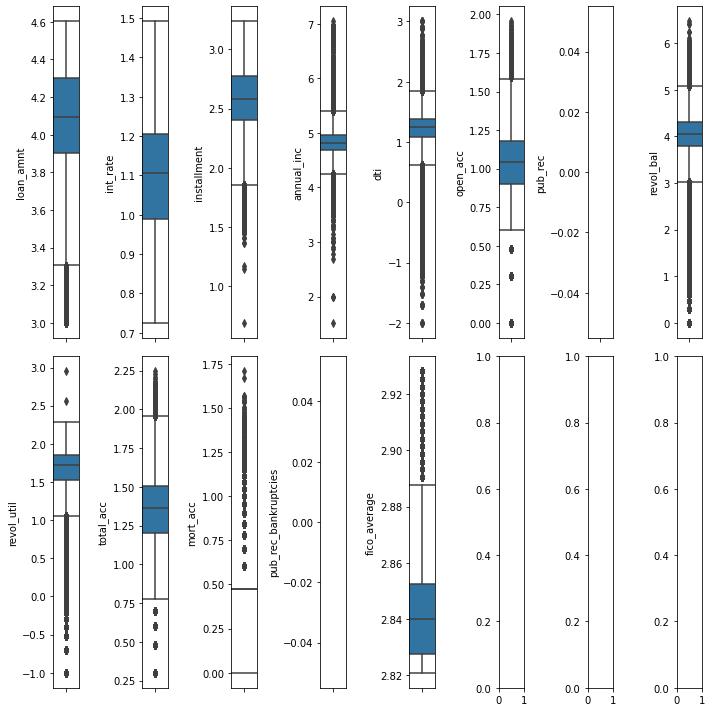

In [ ]:
fig, axes = plt.subplots(2, 8, figsize=(10,10))

for names, ax in zip(float_col, axes.flatten()):
  sns.boxplot(y=names, data=float_col, orient='v', ax=ax, width=8)
plt.tight_layout()

print(float_col.shape)

### Part 2: remove outlier

In [ ]:
re_outlier = pd.DataFrame(np.log10(accepted[['loan_amnt', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'fico_average']]))
no_outlier = pd.DataFrame(np.log10(accepted[['int_rate', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies']]))

lower = re_outlier > re_outlier.quantile(0.05)
re_outlier = re_outlier[lower]
upper = re_outlier < re_outlier.quantile(0.95)
re_outlier = re_outlier[upper]

In [ ]:
lower = re_outlier['revol_util'] > re_outlier['revol_util'].quantile(0.025)
re_outlier = re_outlier[lower]

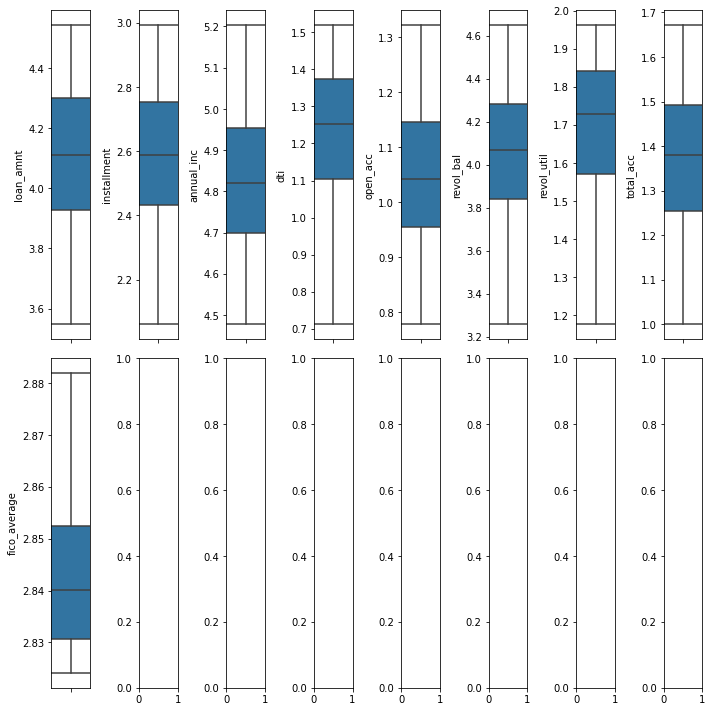

In [ ]:
fig, axes = plt.subplots(2, 8, figsize=(10,10))

for names, ax in zip(re_outlier, axes.flatten()):
  sns.boxplot(y=names, data=re_outlier, orient='v', ax=ax, width=8)
plt.tight_layout()

In [ ]:
re_outlier.isnull().sum()

loan_amnt        99805
installment      97192
annual_inc      112700
dti              94450
open_acc        137133
revol_bal        69698
revol_util           0
total_acc       110993
fico_average    124606
dtype: int64

In [ ]:
re_outlier.dropna(axis=0, how='any', inplace=True)
print(re_outlier.shape)
print(re_outlier.info())

(551021, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 551021 entries, 0 to 2260692
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   loan_amnt     551021 non-null  float64
 1   installment   551021 non-null  float64
 2   annual_inc    551021 non-null  float64
 3   dti           551021 non-null  float64
 4   open_acc      551021 non-null  float64
 5   revol_bal     551021 non-null  float64
 6   revol_util    551021 non-null  float64
 7   total_acc     551021 non-null  float64
 8   fico_average  551021 non-null  float64
dtypes: float64(9)
memory usage: 42.0 MB
None


In [ ]:
re_outlier[re_outlier.isna().any(axis=1)]

Empty DataFrame
Columns: [loan_amnt, installment, annual_inc, dti, open_acc, revol_bal, revol_util, total_acc, fico_average]
Index: []

### Part 3: convert to original number and concat

In [ ]:
num_col = pd.concat([(10 ** re_outlier), (10 ** no_outlier)], axis=1)
num_col.head()

loan_amnt  installment  annual_inc    dti  open_acc  revol_bal  revol_util  \
0     3600.0       123.03     55000.0   5.91       7.0     2765.0        29.7   
1        NaN          NaN         NaN    NaN       NaN        NaN         NaN   
4    10400.0       289.91    104433.0  25.37      12.0    21929.0        64.5   
5        NaN          NaN         NaN    NaN       NaN        NaN         NaN   
6        NaN          NaN         NaN    NaN       NaN        NaN         NaN   

   total_acc  fico_average  int_rate  pub_rec  mort_acc  pub_rec_bankruptcies  
0       13.0         677.0     13.99      0.0       1.0                   0.0  
1        NaN           NaN     11.99      0.0       4.0                   0.0  
4       35.0         697.0     22.45      0.0       6.0                   0.0  
5        NaN           NaN     13.44      0.0       0.0                   0.0  
6        NaN           NaN      9.17      0.0       4.0                   0.0

In [ ]:
accepted = pd.concat([num_col, obj], axis=1)
accepted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199639 entries, 0 to 2260697
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   loan_amnt              551021 non-null   float64
 1   installment            551021 non-null   float64
 2   annual_inc             551021 non-null   float64
 3   dti                    551021 non-null   float64
 4   open_acc               551021 non-null   float64
 5   revol_bal              551021 non-null   float64
 6   revol_util             551021 non-null   float64
 7   total_acc              551021 non-null   float64
 8   fico_average           551021 non-null   float64
 9   int_rate               1199639 non-null  float64
 10  pub_rec                1199639 non-null  float64
 11  mort_acc               1199639 non-null  float64
 12  pub_rec_bankruptcies   1199639 non-null  float64
 13  term                   1199639 non-null  object 
 14  grade             

In [ ]:
accepted.dropna(axis=0, how='any', inplace=True)
accepted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551021 entries, 0 to 2260692
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              551021 non-null  float64
 1   installment            551021 non-null  float64
 2   annual_inc             551021 non-null  float64
 3   dti                    551021 non-null  float64
 4   open_acc               551021 non-null  float64
 5   revol_bal              551021 non-null  float64
 6   revol_util             551021 non-null  float64
 7   total_acc              551021 non-null  float64
 8   fico_average           551021 non-null  float64
 9   int_rate               551021 non-null  float64
 10  pub_rec                551021 non-null  float64
 11  mort_acc               551021 non-null  float64
 12  pub_rec_bankruptcies   551021 non-null  float64
 13  term                   551021 non-null  object 
 14  grade                  551021 non-n

# Dummy - accepted

In [ ]:
df = accepted[['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'title',
       'addr_state', 'application_type', 'initial_list_status', 'loan_status']]

df.head()

term grade sub_grade            emp_title emp_length home_ownership  \
0    36 months     C        C4              leadman  10+ years       MORTGAGE   
4    60 months     F        F1  Contract Specialist    3 years       MORTGAGE   
8    36 months     A        A2      SERVICE MANAGER    6 years           RENT   
13   60 months     E        E2     Software Manager    7 years           RENT   
16   36 months     A        A4        Sales Manager  10+ years       MORTGAGE   

   verification_status             purpose                    title  \
0         Not Verified  debt_consolidation       Debt consolidation   
4      Source Verified      major_purchase           Major purchase   
8         Not Verified         credit_card  Credit card refinancing   
13        Not Verified  debt_consolidation       Debt consolidation   
16        Not Verified  debt_consolidation       Debt consolidation   

   addr_state application_type initial_list_status loan_status  
0          PA       Individual                   w           1  
4          PA       Individual                   w           1  
8          PA       Individual                   w           1  
13         CA       Individual                   w           0  
16         VA       Individual                   w           1

In [ ]:
for all_col in df.columns:
  print(all_col, ":", df[all_col].nunique())

term : 2
grade : 7
sub_grade : 35
emp_title : 190394
emp_length : 11
home_ownership : 6
verification_status : 3
purpose : 13
title : 24453
addr_state : 51
application_type : 2
initial_list_status : 2
loan_status : 2


As some columns has many unique values and redundancy, we're going to drop some of them.

In [ ]:
accepted.drop(['sub_grade', 'emp_title', 'title', 'addr_state'], axis=1, inplace=True)

In [ ]:
category = accepted[['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'initial_list_status']]

for x in category.columns:
  accepted = pd.get_dummies(accepted, columns=[x], drop_first=False)

In [ ]:
print(accepted.isnull().sum())
print("*****************************", end='\n\n')
print(accepted.info())

loan_amnt                      0
installment                    0
annual_inc                     0
dti                            0
open_acc                       0
                              ..
purpose_wedding                0
application_type_Individual    0
application_type_Joint App     0
initial_list_status_f          0
initial_list_status_w          0
Length: 61, dtype: int64
*****************************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551021 entries, 0 to 2260692
Data columns (total 61 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            551021 non-null  float64
 1   installment                          551021 non-null  float64
 2   annual_inc                           551021 non-null  float64
 3   dti                                  551021 non-null  float64
 4   open_acc                             551021 non-null  float64


# Dummy convert numeric variable - accepted

In [ ]:
accepted.head()

loan_amnt  installment  annual_inc    dti  open_acc  revol_bal  \
0      3600.0       123.03     55000.0   5.91       7.0     2765.0   
4     10400.0       289.91    104433.0  25.37      12.0    21929.0   
8     10000.0       306.45     85000.0  13.07      14.0    10464.0   
13    18000.0       471.70    150000.0   9.39      18.0    14052.0   
16    25000.0       777.55    109000.0  26.02       9.0    20862.0   

    revol_util  total_acc  fico_average  int_rate  pub_rec  mort_acc  \
0         29.7       13.0         677.0     13.99      0.0       1.0   
4         64.5       35.0         697.0     22.45      0.0       6.0   
8         34.5       23.0         687.0      6.49      1.0       1.0   
13        40.7       27.0         667.0     19.48      1.0       2.0   
16        54.3       19.0         747.0      7.49      0.0       3.0   

    pub_rec_bankruptcies loan_status  earliest_cr_line_year  term_ 36 months  \
0                    0.0           1                   2003                1   
4                    0.0           1                   1998                0   
8                    1.0           1                   2002                1   
13                   1.0           0                   2005                0   
16                   0.0           1                   2001                1   

    term_ 60 months  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
0                 0        0        0        1        0        0        0   
4                 1        0        0        0        0        0        1   
8                 0        1        0        0        0        0        0   
13                1        0        0        0        0        1        0   
16                0        1        0        0        0        0        0   

    grade_G  emp_length_1 year  emp_length_10+ years  emp_length_2 years  \
0         0                  0                     1                   0   
4         0                  0                     0                   0   
8         0                  0                     0                   0   
13        0                  0                     0                   0   
16        0                  0                     1                   0   

    emp_length_3 years  emp_length_4 years  emp_length_5 years  \
0                    0                   0                   0   
4                    1                   0                   0   
8                    0                   0                   0   
13                   0                   0                   0   
16                   0                   0                   0   

    emp_length_6 years  emp_length_7 years  emp_length_8 years  \
0                    0                   0                   0   
4                    0                   0                   0   
8                    1                   0                   0   
13                   0                   1                   0   
16                   0                   0                   0   

    emp_length_9 years  emp_length_< 1 year  home_ownership_ANY  \
0                    0                    0                   0   
4                    0                    0                   0   
8                    0                    0                   0   
13                   0                    0                   0   
16                   0                    0                   0   

    home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                         1                    0                     0   
4                         1                    0                     0   
8                         0                    0                     0   
13                        0                    0                     0   
16                        1                    0                     0   

    home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  \
0                    0    

In [ ]:
print(np.sort(accepted['pub_rec'].unique()), end='\n\n')
print(np.sort(accepted['pub_rec_bankruptcies'].unique()), end='\n\n')
print(np.sort(accepted['mort_acc'].unique()), end='\n\n')
print(np.sort(accepted['total_acc'].unique()), end='\n\n')
print(np.sort(accepted['fico_average'].unique()), end='\n\n')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 22. 23. 24. 25. 34. 46. 47. 54. 61. 86.]

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 12.]

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 24. 25. 26. 30.]

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.
 46. 47.]

[667. 672. 677. 682. 687. 692. 697. 702. 707. 712. 717. 722. 727. 732.
 737. 742. 747. 752. 757. 762.]



In [ ]:
accepted['binned_pub_rec'] = pd.cut(accepted['pub_rec'], 
                                    bins=[-np.inf, 0, 1, 2, 3, 4, np.inf],
                                    labels=[0, 1, 2, 3, 4, 5])

accepted['binned_rec_bankruptcies'] = pd.cut(accepted['pub_rec_bankruptcies'],
                                             bins=[-np.inf, 0, 1, 2, 3, 4, np.inf],
                                             labels=[0, 1, 2, 3, 4, 5])

accepted['binned_mort_acc'] = pd.cut(accepted['mort_acc'],
                                             bins=[-np.inf, 0, 1, 2, 3, 4, np.inf],
                                             labels=[0, 1, 2, 3, 4, 5])

In [ ]:
accepted.drop(['pub_rec', 'pub_rec_bankruptcies', 'mort_acc'], axis=1, inplace=True)
accepted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551021 entries, 0 to 2260692
Data columns (total 61 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   loan_amnt                            551021 non-null  float64 
 1   installment                          551021 non-null  float64 
 2   annual_inc                           551021 non-null  float64 
 3   dti                                  551021 non-null  float64 
 4   open_acc                             551021 non-null  float64 
 5   revol_bal                            551021 non-null  float64 
 6   revol_util                           551021 non-null  float64 
 7   total_acc                            551021 non-null  float64 
 8   fico_average                         551021 non-null  float64 
 9   int_rate                             551021 non-null  float64 
 10  loan_status                          551021 non-null  object  
 11 

In [ ]:
# change datatypes from category/object to int

accepted['loan_status'] = accepted['loan_status'].astype(int)
accepted['binned_pub_rec'] = accepted['binned_pub_rec'].astype(int)
accepted['binned_rec_bankruptcies'] = accepted['binned_rec_bankruptcies'].astype(int)
accepted['binned_mort_acc'] = accepted['binned_mort_acc'].astype(int)

# Train and Test - accepted

In [ ]:
X = accepted.drop(columns = 'loan_status', axis=1)
y = accepted['loan_status']

In [ ]:
print(X.shape)
print(y.shape)

(551021, 60)
(551021,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(440816, 60) (110205, 60) (440816,) (110205,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model of Multiclass Classification

## Logistic Regression

**Precision:** is the ratio between the True Positives and all the Positives. TP / (TP + FP).

*Ex:* correctly classified borrowers with the fully paid (TP) to the total borrowers predicted to have the fully paid, but actually mix in charged off (TP + FP) 

**Recall:** is the measure of our model correctly identifying True Positives. TP / (TP + FN)

*Ex:* correctly classified fully paid borrowers (TP) divided by total number of borrowers who have actually the fully paid (TP + FN).

> In loan, we want to avoid losing money, so having **High Recall** is the best since we can get all the borrowers that have actual fully paid status.

> **Low Precision** is fine since it get mix both actual fully paid and actual charged off. We really want to see the actual result of fully paid, more than charged off.

In [ ]:
logRe = LogisticRegression()
logRe.fit(X_train, y_train)
pred = logRe.predict(X_test)

print("Accuracy of logistic regression classifier on test set:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy of logistic regression classifier on test set: 0.8110249081257657
Precision: 0.8165750559843059
Recall: 0.9887504481893151


![](https://drive.google.com/uc?export=view&id=1SRfivqXfrUcsl0DUNAvscpMkIHz287HQ)

![](https://drive.google.com/uc?export=view&id=1cRqpFVOTHCxoH-0zTk3YzqwkrwY7V8Id)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, pred)
cnf_matrix

array([[ 1135, 19822],
       [ 1004, 88244]])

> *   0 = Charged off
> *   1 = Fully paid

*   TP : Borrowers fully pay everything, and it is true.
*   FP : The model predict borrowers fully pay everything, but they actually charged off.
*   TN : Borrowers charged off from Lending Club, and it is true.
*   FN : The model predict borrowers charged off, but they actually fully paid.

Text(0.5, 1.0, 'Predicted Classes')

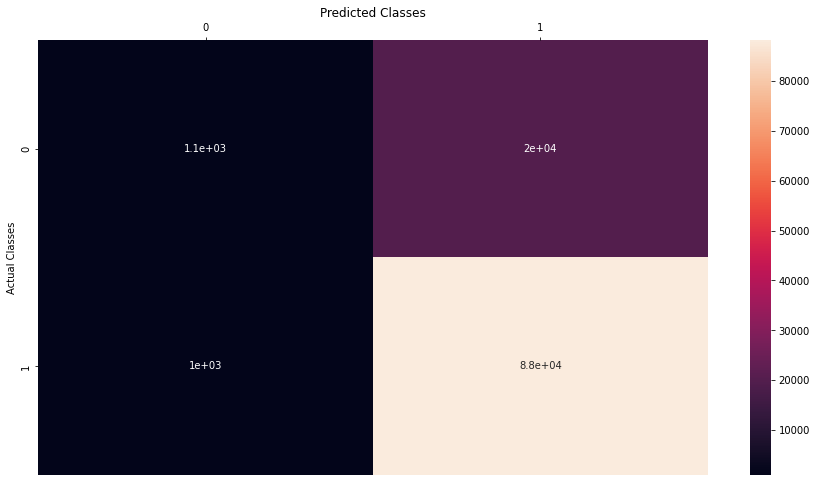

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.heatmap(cnf_matrix, annot=True)
ax.xaxis.set_ticks_position('top')
plt.ylabel('Actual Classes')
plt.title('Predicted Classes')

## Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(f"Accuracy of DecisionTree classifier on test set: {metrics.accuracy_score(y_test, pred)}")

Accuracy of DecisionTree classifier on test set: 0.7079896556417585


In [ ]:
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(f"Accuracy of DecisionTree classifier on test set: {metrics.accuracy_score(y_test, pred)}")

Accuracy of DecisionTree classifier on test set: 0.7122998049090332


## Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(f"Accuracy of RandomForest classifier on test set: {metrics.accuracy_score(y_test, pred)}")
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy of RandomForest classifier on test set: 0.8094914023864616
Precision: 0.8187753958245761
Recall: 0.9821396557906059


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, pred)
cnf_matrix

array([[ 1556, 19401],
       [ 1594, 87654]])

Text(0.5, 1.0, 'Predicted Classes')

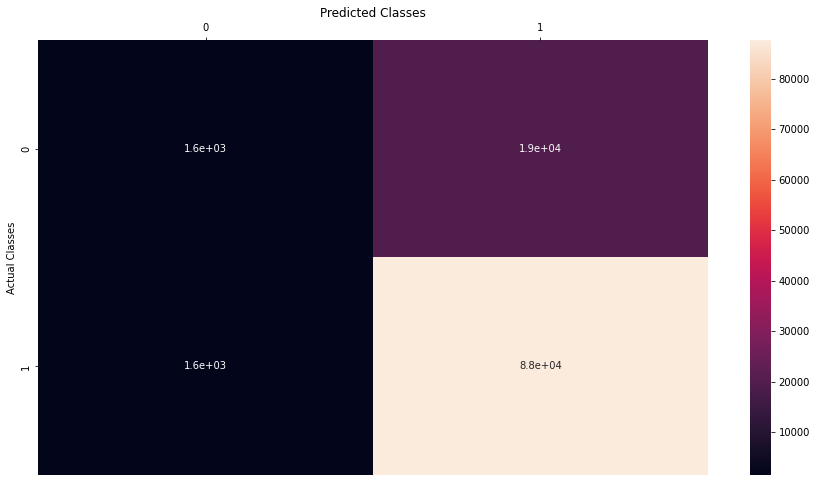

In [ ]:
# 0 = Charged off
# 1 = Fully paid

fig, ax = plt.subplots(figsize = (15,8))
ax = sns.heatmap(cnf_matrix, annot=True)
ax.xaxis.set_ticks_position('top')
plt.ylabel('Actual Classes')
plt.title('Predicted Classes')

## Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print(f"Accuracy of naive bayes on test set: {metrics.accuracy_score(y_test, pred)}")

Accuracy of naive bayes on test set: 0.7562270314414047


## Roc Curve

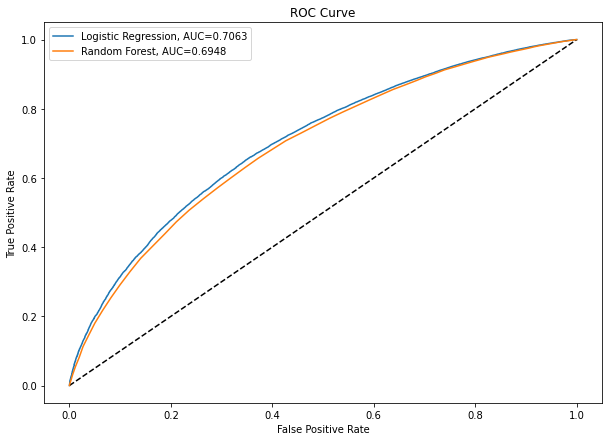

In [ ]:
plt.figure(figsize=(10, 7))

y_pred_prob = logRe.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr, tpr, label="Logistic Regression, AUC="+str(auc))

y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="Random Forest, AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Just testing references we learn to train from the model

# Outlier: Part 2

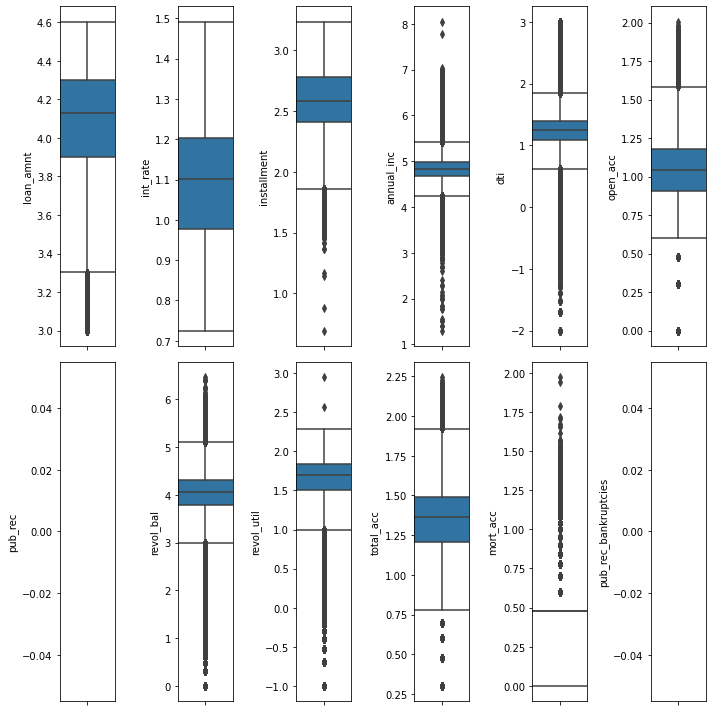

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(10,10))

for names, ax in zip(float_col, axes.flatten()):
  sns.boxplot(y=names, data=float_col, orient='v', ax=ax, width=8)
plt.tight_layout()

In [ ]:
for x in float_col:
    q75,q25 = np.percentile(float_col.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    float_col.loc[float_col[x] < min,x] = np.nan
    float_col.loc[float_col[x] > max,x] = np.nan

In [ ]:
pd.DataFrame({"Datatype": float_col.dtypes,
              "Missing": float_col.isnull().sum()})

Datatype  Missing
loan_amnt             float64    38108
int_rate              float64        0
installment           float64    38311
annual_inc            float64    31586
dti                   float64        2
open_acc              float64    38401
pub_rec               float64        0
revol_bal             float64    72400
revol_util            float64   101380
total_acc             float64    28534
mort_acc              float64        0
pub_rec_bankruptcies  float64        0

In [ ]:
float_col.dropna(axis=0, how='any', inplace=True)

(1796363, 12)


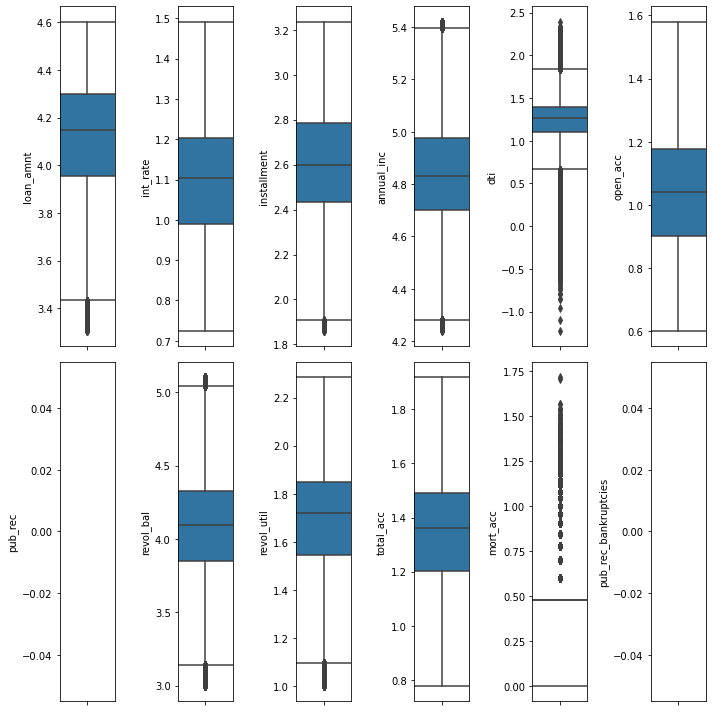

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(10,10))

for names, ax in zip(float_col, axes.flatten()):
  sns.boxplot(y=names, data=float_col, orient='v', ax=ax, width=8)
plt.tight_layout()

print(float_col.shape)

In [ ]:
category = accepted[['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status',
       'application_type']]

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)  #creating instance of one-hot-encoder
encoder_accepted = pd.DataFrame(encoder.fit_transform(category))  #perform one-hot encoding on 'x' columns
encoder_accepted.columns = encoder.get_feature_names(input_features=category.columns)
accepted = pd.concat([accepted, encoder_accepted], axis=1)

In [ ]:
accepted = accepted[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d','loan_status', 'purpose', 
                     'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies',
                     'fico_average', 'delinq_2yrs']] 

In [ ]:
low_install = float_col['installment'] > float_col['installment'].quantile(0.05)
float_col = float_col[low_install]
up_install = float_col['installment'] < float_col['installment'].quantile(0.95)
float_col = float_col[up_install]

# Data inspection - rejected dataset

In [ ]:
# Read rejected data
rejected = pd.read_csv("/content/drive/MyDrive/Jupyter/ML_Project_Load Default/rejected_2007_to_2018Q4.csv")

# Check rejected data at the top
rejected.head()

Amount Requested Application Date                        Loan Title  \
0            1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1            1000.0       2007-05-26                Consolidating Debt   
2           11000.0       2007-05-27       Want to consolidate my debt   
3            6000.0       2007-05-27                           waksman   
4            1500.0       2007-05-27                            mdrigo   

   Risk_Score Debt-To-Income Ratio Zip Code State Employment Length  \
0       693.0                  10%    481xx    NM           4 years   
1       703.0                  10%    010xx    MA          < 1 year   
2       715.0                  10%    212xx    MD            1 year   
3       698.0               38.64%    017xx    MA          < 1 year   
4       509.0                9.43%    209xx    MD          < 1 year   

   Policy Code  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [ ]:
# Check rejected data at the bottom 
rejected.tail()

Amount Requested Application Date          Loan Title  Risk_Score  \
27648736           10000.0       2016-12-31  Debt consolidation       590.0   
27648737           10000.0       2016-12-31              moving         NaN   
27648738            1200.0       2016-12-31               Other       686.0   
27648739           25000.0       2016-12-31  debt_consolidation         NaN   
27648740           15000.0       2016-12-31            Business       684.0   

         Debt-To-Income Ratio Zip Code State Employment Length  Policy Code  
27648736               41.26%    441xx    OH          < 1 year          0.0  
27648737                1.48%    207xx    MD           5 years          0.0  
27648738               10.26%    914xx    CA          < 1 year          0.0  
27648739               17.71%    880xx    NM          < 1 year          0.0  
27648740               10.58%    113xx    NY          < 1 year          0.0

## Duplicate and Missing values - rejected

In [ ]:
# drop duplicate row in rejected
rejected = rejected.drop_duplicates(keep='last')

In [ ]:
# Check the duplicated values
rejected[rejected.duplicated(keep = False)]

Empty DataFrame
Columns: [Amount Requested, Application Date, Loan Title, Risk_Score, Debt-To-Income Ratio, Zip Code, State, Employment Length, Policy Code]
Index: []

In [ ]:
# Check the missing values
missing_rej = pd.DataFrame({'missing_per_rej': round(rejected.isnull().sum()/rejected.shape[0]*100,2),
                            'missing_count_rej': rejected.isnull().sum()})
print(missing_rej)

                      missing_per_rej  missing_count_rej
Amount Requested                 0.00                  0
Application Date                 0.00                  0
Loan Title                       0.00               1283
Risk_Score                      66.79           18359858
Debt-To-Income Ratio             0.00                  0
Zip Code                         0.00                292
State                            0.00                 22
Employment Length                3.45             949702
Policy Code                      0.00                918


## Check info - rejected

In [ ]:
# Check rejected info
print(rejected.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27490787 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 2.0+ GB
None


## Describe the column - rejected

In [ ]:
rejected.describe(include = ['object'])

Application Date          Loan Title Debt-To-Income Ratio  Zip Code  \
count          27490787            27489504             27490787  27490495   
unique             4238               73928               126145      1001   
top          2018-12-04  Debt consolidation                 100%     112xx   
freq              41696             6362745              1311209    262986   

           State Employment Length  
count   27490765          26541085  
unique        51                11  
top           CA          < 1 year  
freq     3218415          22841895

In [ ]:
rejected.describe()

Amount Requested    Risk_Score   Policy Code
count      2.749079e+07  9.130929e+06  2.748987e+07
mean       1.310412e+04  6.281713e+02  6.404832e-03
std        1.488779e+04  8.980838e+01  1.129984e-01
min        0.000000e+00  0.000000e+00  0.000000e+00
25%        4.700000e+03  5.910000e+02  0.000000e+00
50%        1.000000e+04  6.370000e+02  0.000000e+00
75%        2.000000e+04  6.750000e+02  0.000000e+00
max        1.400000e+06  9.900000e+02  2.000000e+00

In [ ]:
for cols in rejected.columns:
  print(cols, ":", rejected[cols].unique(), end='\n\n')

Amount Requested : [  1000.  11000.   6000. ...  73825. 114800.  64075.]

Application Date : ['2007-05-26' '2007-05-27' '2007-05-28' ... '2016-12-29' '2016-12-30'
 '2016-12-31']

Loan Title : ['Wedding Covered but No Honeymoon' 'Consolidating Debt'
 'Want to consolidate my debt' ... 'dougie03' 'freeup'
 'Business Advertising Loan']

Risk_Score : [693. 703. 715. 698. 509. 645. 700. 694. 573. 710. 680. 688. 704. 708.
 685. 712. 684. 686. 719. 602. 475. 695. 671. 638. 429. 632. 579. 474.
 463. 593. 578. 536. 524. 520.   0. 658. 492. 581. 543. 660. 503. 556.
 480. 592. 600. 460. 654. 486. 547. 454. 665. 561. 565. 479. 444. 549.
 599. 650. 607. 419. 758. 504. 711. 530. 473. 606. 502. 497. 709. 412.
 506. 472. 507. 567. 551. 552. 643. 647. 531. 612. 656. 528. 558. 461.
 522. 690. 559. 633. 481. 679. 494. 582. 583. 468. 576. 696. 545. 626.
 640. 667. 609. 450.  nan 716. 653. 621. 629. 615. 608. 628. 585. 493.
 512. 598. 490. 588. 523. 557. 548. 489. 535. 639. 478. 736. 533. 635.
 631. 445. 59